In [1]:
import numpy as np
import pandas as pd

url = "RadNet_Laboratory_Analysis.csv"
df = pd.read_csv(url)


In [2]:
columns = df.columns
id_cols = ['State', 'Location', "Date Posted", 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns) - set(id_cols))
columns


['I-131',
 'Cs-136',
 'Cs-134',
 'Cs-137',
 'Co-60',
 'Ba-140',
 'Ba-140.1',
 'Te-129m',
 'I-133',
 'Te-129',
 'I-132',
 'Te-132']

In [3]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if x == "Non-detect" else x)
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'Non-detect' else x)
df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'ND' else x)


C:\Users\MouKexin\AppData\Local\Temp\ipykernel_18892\1047216724.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'Non-detect' else x)
C:\Users\MouKexin\AppData\Local\Temp\ipykernel_18892\1047216724.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:, columns] = df.loc[:, columns].applymap(lambda x: np.nan if x == 'ND' else x)


In [4]:
df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']] = df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']].applymap(lambda x: x.strip())

C:\Users\MouKexin\AppData\Local\Temp\ipykernel_18892\3328840151.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']] = df.loc[:, ['State', 'Location', 'Sample Type', 'Unit']].applymap(lambda x: x.strip())


In [5]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])


ValueError: time data "04-04-2011" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [6]:
for col in columns:
    df[col] = pd.to_numeric(df[col])


In [7]:
df['State'] = df['State'].astype('category')
df['Location'] = df['Location'].astype('category')
df['Unit'] = df['Unit'].astype('category')
df['Sample Type'] = df['Sample Type'].astype('category')


  State Location Date Posted Date Collected Sample Type    Unit  Ba-140  \
0    ID    Boise  03/30/2011     03/23/2011  Air Filter  pCi/m3     0.0   
1    ID    Boise  03/30/2011     03/23/2011  Air Filter  pCi/m3     0.0   
2    AK   Juneau  03/30/2011     03/23/2011  Air Filter  pCi/m3     0.0   
3    AK     Nome  03/30/2011     03/22/2011  Air Filter  pCi/m3     0.0   
4    AK     Nome  03/30/2011     03/23/2011  Air Filter  pCi/m3     0.0   

   Co-60  Cs-134  Cs-136  Cs-137  I-131  I-132  I-133  Te-129  Te-129m  \
0    0.0       0     NaN       0      0      0    0.0     NaN      NaN   
1    0.0       0     NaN       0      0      0    0.0     NaN      NaN   
2    0.0       0     NaN       0      0      0    0.0     NaN      NaN   
3    0.0       0     NaN       0      0      0    0.0     NaN      NaN   
4    0.0       0     NaN       0      0      0    0.0     NaN      NaN   

   Te-132  Ba-140.1  
0       0       NaN  
1       0       NaN  
2       0       NaN  
3       0       

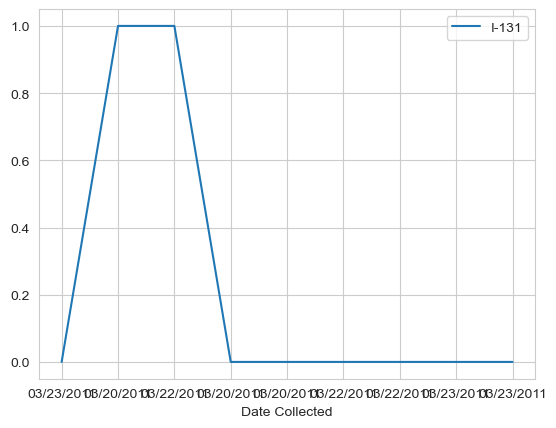

In [8]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131')
print(df.head())

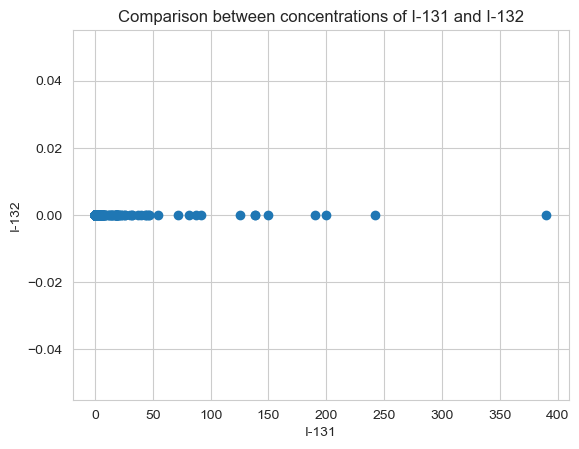

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I-132',
    title='Comparison between concentrations of I-131 and I-132'
)


In [10]:
import matplotlib.pyplot as plt
df = {'Chinese':109, 'American':88, 'German': 66, 'Korea':23, 'Japan':5, 'England':118}
df1 = pd.DataFrame.from_dict(df,orient='index')
df1.columns = { 'value'}
#print(df1)

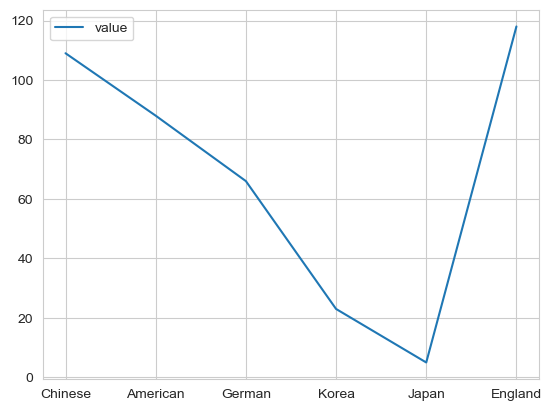

In [11]:
df1.plot()
plt.show()

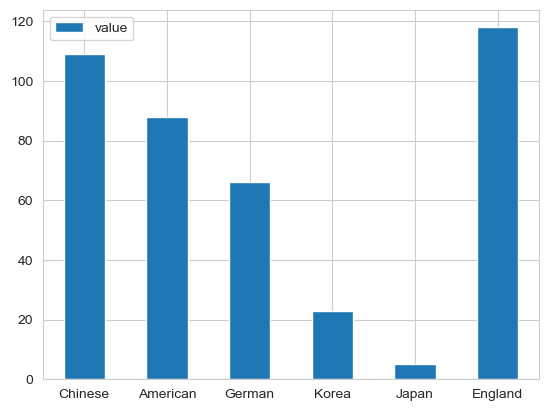

In [12]:
df1.plot(kind='bar', rot=0)
plt.show()